In [2]:
import sys, os
import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import numpy_utils
from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm
import cmocean

from plotting import load_fits, plot_utils

In [3]:
# Load everything

models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)
feature_type='sketch_tokens'
subject='all'

mean, var, covar = \
        load_feature_stats.load_feature_stats(feature_type, subject='all')
corr, discrim, nsamp, names, signed_names = \
        load_feature_stats.load_feature_semantic_corrs(feature_type, subject='all', \
                                                       min_samp=20, verbose=True)
partial_corr, partial_nsamp, partial_names, partial_signed_names = \
        load_feature_stats.load_feature_semantic_partial_corrs(feature_type, subject='all',\
                                                       min_samp=20, verbose=True)

n_total_discrim_types = corr.shape[2]
n_features = corr.shape[0]
n_partial_discrim_types = partial_corr.shape[2]
axes_to_do_partial = [0,2,3]


excluding 2 pRFs for within_electronic
excluding 3 pRFs for within_sports


In [4]:
# make inverted names, for convenience
partial_signed_names_inverse = []
for pp in partial_signed_names:
    part1, part2 = pp.split(' > ')
    partial_signed_names_inverse.append('%s > %s'%(part2, part1))


In [7]:
# make some groups (averaging over all superord or basic level discrims)
# will help smooth out the noise for these low-n discriminations

inds2group = [[0], [1], [2], [3], [4], np.arange(5,17), np.arange(28,44), \
              np.arange(17,28), np.arange(44,56)]
group_names = [names[ii] for ii in [0,1,2,3,4]] + \
                ['things-superord','stuff-superord' ,'things-basic', 'stuff-basic']

sem_discrim_grouped = np.zeros((n_features, n_prfs, len(group_names)))
sem_corr_grouped = np.zeros((n_features, n_prfs, len(group_names)))

for gg, inds in enumerate(inds2group):
    # here we need a nanmean, because some of these values can be nan, when there were not
    # enough trials for at least one of the categories. Consider only the not-nan ones here.
    sem_discrim_grouped[:,:,gg] = np.nanmean(np.abs(discrim[:,:,inds]), axis=2)
    sem_corr_grouped[:,:,gg] = np.nanmean(np.abs(corr[:,:,inds]), axis=2)
    print(group_names[gg])
    print(np.array(names)[inds])

indoor_outdoor
['indoor_outdoor']
natural_humanmade
['natural_humanmade']
animacy
['animacy']
real_world_size_binary
['real_world_size_binary']
real_world_size_continuous
['real_world_size_continuous']
things-superord
['accessory' 'animal' 'appliance' 'electronic' 'food' 'furniture' 'indoor'
 'kitchen' 'outdoor' 'person' 'sports' 'vehicle']
stuff-superord
['building' 'ceiling' 'floor' 'food-stuff' 'furniture-stuff' 'ground'
 'other' 'plant' 'raw-material' 'sky' 'solid' 'structural' 'textile'
 'wall' 'water' 'window']
things-basic
['within_accessory' 'within_animal' 'within_appliance' 'within_electronic'
 'within_food' 'within_furniture' 'within_indoor' 'within_kitchen'
 'within_outdoor' 'within_sports' 'within_vehicle']
stuff-basic
['within_building' 'within_floor' 'within_food-stuff'
 'within_furniture-stuff' 'within_ground' 'within_plant'
 'within_raw-material' 'within_solid' 'within_structural' 'within_textile'
 'within_wall' 'within_water']


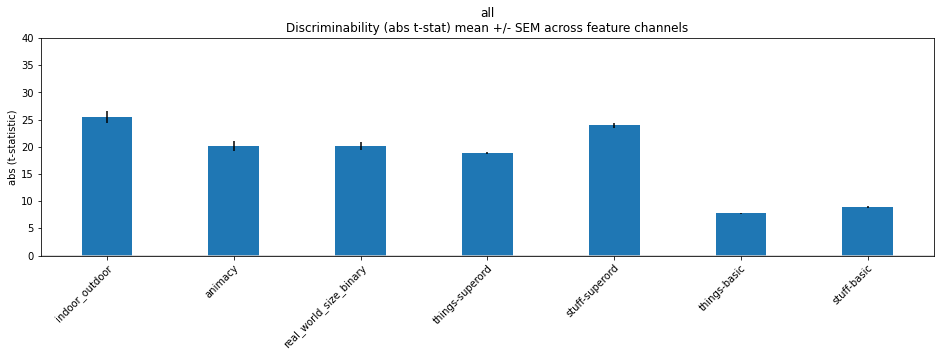

In [5]:
# Plot abs t-statistic, across all features

dd2plot = [0,2,3,5,6,7,8]
names_plot = [group_names[dd] for dd in dd2plot]
# first mean across pRFs
vals = np.mean(sem_discrim_grouped[:,:,dd2plot], axis=1)
# then mean across features
mean_vals = np.mean(vals, axis=0, keepdims=True)
sem_vals = np.std(vals, axis=0, keepdims=True)/np.sqrt(n_features)

title = '%s\nDiscriminability (abs t-stat) mean +/- SEM across feature channels'%subject

fh = plot_utils.plot_multi_bars(mean_data=mean_vals.T, err_data=sem_vals.T, \
                           colors=None, space=0.3, \
                            xticklabels=names_plot, ylabel='abs (t-statistic)', \
                            ylim=[0, 40], title=title, horizontal_line_pos=0,\
                            legend_labels=None, \
                            legend_overlaid=False, legend_separate=False, \
                            fig_size=(16,4))


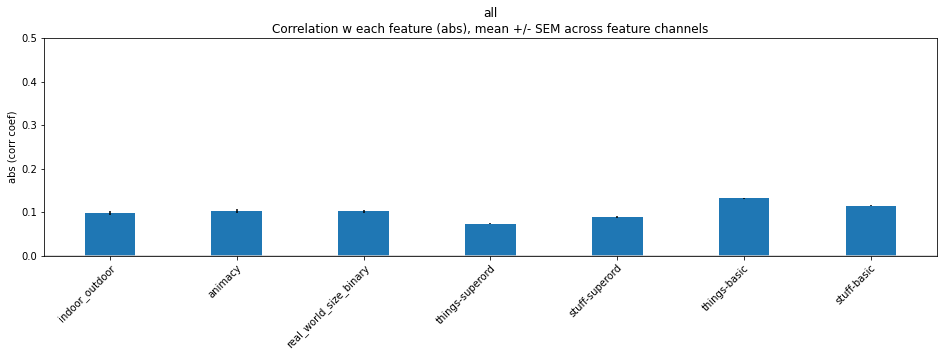

In [6]:
# Plot abs corr coef, across all features

dd2plot = [0,2,3,5,6,7,8]
names_plot = [group_names[dd] for dd in dd2plot]
# first mean across pRFs
vals = np.mean(sem_corr_grouped[:,:,dd2plot], axis=1)
# then mean across features
mean_vals = np.mean(vals, axis=0, keepdims=True)
sem_vals = np.std(vals, axis=0, keepdims=True)/np.sqrt(n_features)

title = '%s\nCorrelation w each feature (abs), mean +/- SEM across feature channels'%subject

fh = plot_utils.plot_multi_bars(mean_data=mean_vals.T, err_data=sem_vals.T, \
                           colors=None, space=0.3, \
                            xticklabels=names_plot, ylabel='abs (corr coef)', \
                            ylim=[0, 0.5], title=title, horizontal_line_pos=0,\
                            legend_labels=None, \
                            legend_overlaid=False, legend_separate=False, \
                            fig_size=(16,4))


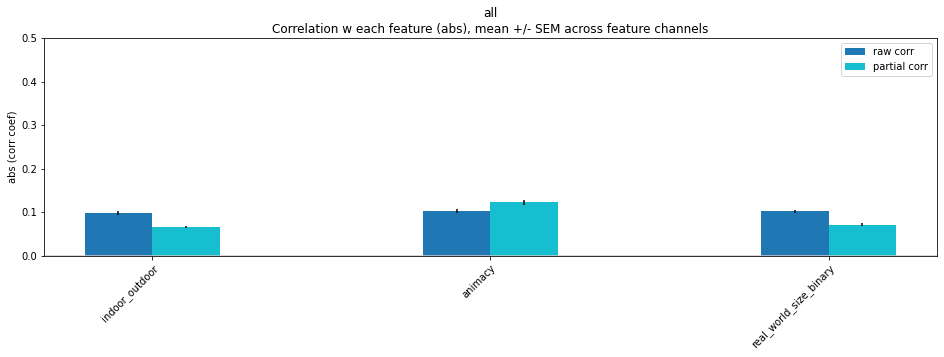

In [7]:
# Plot partial correlation coefficients for three main axes, across all features

names_plot = [names[dd] for dd in axes_to_do_partial]
# first mean across pRFs
vals = np.concatenate( [ np.mean(np.abs(corr[:,:,axes_to_do_partial]), axis=1, keepdims=True), \
                        np.mean(np.abs(partial_corr), axis=1, keepdims=True)], axis=1)
# then mean across features
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0)/np.sqrt(n_features)

title = '%s\nCorrelation w each feature (abs), mean +/- SEM across feature channels'%subject

fh = plot_utils.plot_multi_bars(mean_data=mean_vals.T, err_data=sem_vals.T, \
                           colors=None, space=0.3, \
                            xticklabels=names_plot, ylabel='abs (corr coef)', \
                            ylim=[0, 0.5], title=title, horizontal_line_pos=0,\
                            legend_labels=['raw corr','partial corr'], \
                            legend_overlaid=True, legend_separate=False, \
                            fig_size=(16,4))


In [8]:
# Load information about the sketch tokens features
from utils import default_paths
import scipy.stats
import pandas as pd
from scipy.io import loadmat

cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]
feature_ims = np.moveaxis(feature_ims, [0,1,2], [1,0,2])

fn = os.path.join(default_paths.sketch_token_feat_path,\
                  'Sketch_token_feature_curvrect_stats.npy')
stats = np.load(fn, allow_pickle=True).item()
c_means1 = np.mean(np.mean(stats['curv_score_method1'], axis=0), axis=0)
l_means1 = np.mean(np.mean(stats['lin_score_method1'], axis=0), axis=0)

curv_score = scipy.stats.zscore(c_means1)
lin_score = scipy.stats.zscore(l_means1)

dfname = os.path.join(default_paths.sketch_token_feat_path, \
                      'Sketch_tokens_info_table.csv')
df = pd.read_csv(dfname)

estim_bend_values = np.round(np.array(df['best_bend']),4)
estim_orient_values = np.round(np.array(df['best_orient']*180/np.pi),2)
best_linear_index = np.array(df['best_linear_index'])
best_curv_index = np.array(df['best_curv_index'])
which_best = np.array(df['which_best'])

is_single = df['single']
is_straight_line = is_single & (estim_bend_values==0)
is_curved_line = is_single & (estim_bend_values>0)

is_junction = df['junction']
is_double = df['double']
is_other = df['other']

feature_groups = [is_straight_line, is_curved_line, is_double, is_junction, is_other]
feature_group_names = ['straight line', 'curved line', 'double line', 'junction', 'other']

freq_values_cyc_per_image = np.linspace(2,7,4)
bend_values = np.round(np.linspace(0, 0.30, 8),4)
orient_values = np.linspace(0,360,73)[0:72]
n_ori = len(orient_values)
n_bend = len(bend_values)

In [9]:
# making a more logical order for the features

sort_order = np.zeros((150,),dtype=int)
start_ind = 0
for ii, inds in enumerate(feature_groups):
    
    inds = np.where(inds)[0]
    ori = np.mod(estim_orient_values[inds], 180)
    bend = estim_bend_values[inds]
    inds_sorted, order = numpy_utils.double_sort(inds, ori, bend)

    sort_order[start_ind:start_ind+len(inds)] = inds_sorted
    print([start_ind, start_ind+len(inds)])
    
    start_ind+=len(inds)
    

[0, 17]
[17, 83]
[83, 118]
[118, 149]
[149, 150]


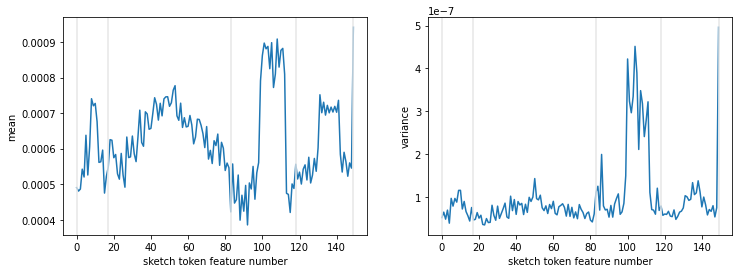

In [23]:
# Plot mean/variance each feature channel
# Averaged across pRFs

plt.figure(figsize=(12,4));

plt.subplot(1,2,1)
plt.plot(np.mean(mean, axis=1)[sort_order])
plt.xlabel('sketch token feature number');
plt.ylabel('mean');
start_ind=0;
for ii, inds in enumerate(feature_groups):    
    plt.axvline(start_ind, color=[0.9, 0.9, 0.9])
    start_ind+=np.sum(inds)
    
plt.subplot(1,2,2)
plt.plot(np.mean(var, axis=1)[sort_order])
plt.xlabel('sketch token feature number');
plt.ylabel('variance');
start_ind=0;
for ii, inds in enumerate(feature_groups):    
    plt.axvline(start_ind, color=[0.9, 0.9, 0.9])
    start_ind+=np.sum(inds)
    

Text(0.5, 0.98, 'Covariance of sketch tokens features, across entire image set\n(averaged over pRFs)')

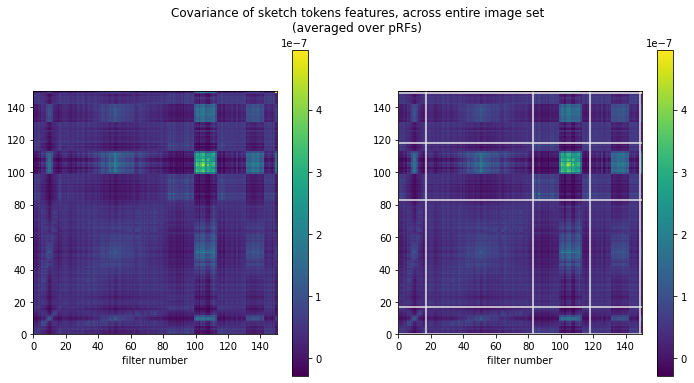

In [24]:
# Plot covariance 

plt.figure(figsize=(12,6));

c = np.mean(covar, axis=2)
c_sorted = c[sort_order,:][:,sort_order]
plt.subplot(1,2,1)
plt.pcolormesh(c_sorted)
plt.colorbar()
plt.axis('square')
plt.xlabel('filter number')
plt.xlabel('filter number')

plt.subplot(1,2,2)
plt.pcolormesh(c_sorted);
plt.colorbar()
plt.axis('square')
plt.xlabel('filter number')
plt.xlabel('filter number')
start_ind=0;
for ii, inds in enumerate(feature_groups):    
    plt.axvline(start_ind, color=[0.9, 0.9, 0.9])
    plt.axhline(start_ind, color=[0.9, 0.9, 0.9])
    start_ind+=np.sum(inds)
    
plt.suptitle('Covariance of sketch tokens features, across entire image set\n(averaged over pRFs)')

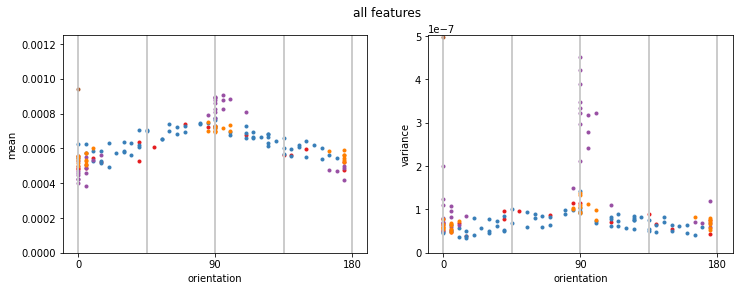

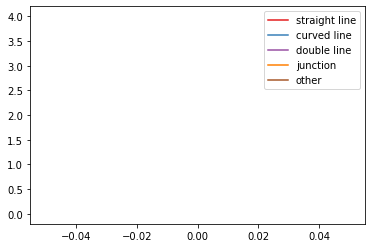

In [53]:
plt.figure(figsize=(12,4));

ori = np.mod(estim_orient_values, 180)

colors = cm.Set1(np.linspace(0,1,7))

for ii, inds in enumerate(feature_groups):

    plt.subplot(1,2,1)
    yvals = np.mean(mean[inds,:], axis=1)
    plt.plot(ori[inds], yvals,'.',color=colors[ii,:])
    plt.xlabel('orientation');
    plt.ylabel('mean');
    plt.xlim([-10, 190])
    ylims = [0, 0.00125]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))
    plt.xticks([0,90,180])
    for oo in np.arange(0,190,45):
        plt.axvline(oo, color=[0.8, 0.8, 0.8])

    plt.subplot(1,2,2)
    yvals = np.mean(var[inds,:], axis=1)
    plt.plot(ori[inds], yvals,'.',color=colors[ii,:])
    plt.xlabel('orientation');
    plt.ylabel('variance');
    plt.xlim([-10, 190])
    ylims = [0, 10**(-6.3)]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))
    plt.xticks([0,90,180])
    for oo in np.arange(0,190,45):
        plt.axvline(oo, color=[0.8, 0.8, 0.8])

plt.suptitle('all features')

plt.figure()
for ii in range(5):
    plt.plot(0,ii,color=colors[ii,:])
plt.legend(feature_group_names)

In [6]:
# Plot mean/variance each feature channel
# Averaged across pRFs
for ii, inds in enumerate(feature_groups):

    plt.figure(figsize=(12,4));

    ori = np.mod(estim_orient_values[inds], 180)
   
    plt.subplot(1,2,1)
    yvals = np.mean(mean[inds,:], axis=1)
    plt.plot(ori, yvals,'.')
    plt.xlabel('orientation');
    plt.ylabel('mean');
    plt.xlim([-10, 190])
    ylims = [0, 0.00125]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))
    plt.xticks([0,90,180])
    for oo in np.arange(0,190,45):
        plt.axvline(oo, color=[0.8, 0.8, 0.8])
    
    plt.subplot(1,2,2)
    yvals = np.mean(var[inds,:], axis=1)
    plt.plot(ori, yvals,'.')
    plt.xlabel('orientation');
    plt.ylabel('variance');
    plt.xlim([-10, 190])
    ylims = [0, 10**(-6.3)]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))
    plt.xticks([0,90,180])
    for oo in np.arange(0,190,45):
        plt.axvline(oo, color=[0.8, 0.8, 0.8])
    
    plt.suptitle(feature_group_names[ii])

NameError: name 'feature_groups' is not defined

Text(0.5, 0.98, 'single-line features')

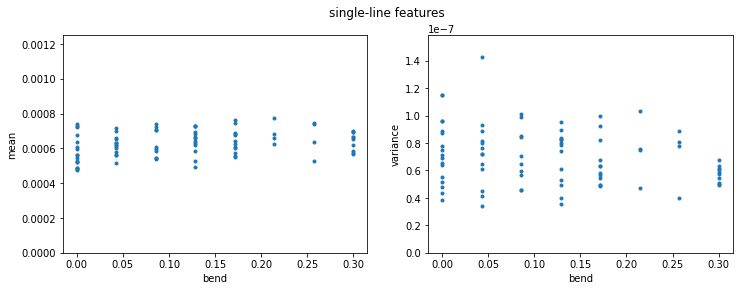

In [31]:
plt.figure(figsize=(12,4));

inds = is_single

bend = estim_bend_values[is_single]

plt.subplot(1,2,1)
yvals = np.mean(mean[inds,:], axis=1)
plt.plot(bend, yvals,'.')
plt.xlabel('bend');
plt.ylabel('mean');
ylims = [0, 0.00125]
plt.ylim(ylims)
assert(np.all(yvals<ylims[1]))

plt.subplot(1,2,2)
yvals = np.mean(var[inds,:], axis=1)
plt.plot(bend, yvals,'.')
plt.xlabel('bend');
plt.ylabel('variance');
ylims = [0, 10**(-6.8)]
plt.ylim(ylims)
assert(np.all(yvals<ylims[1]))

plt.suptitle('single-line features')

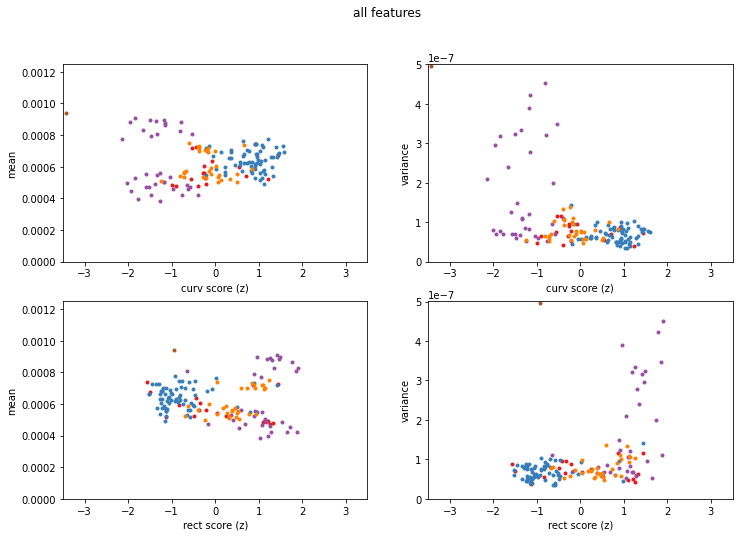

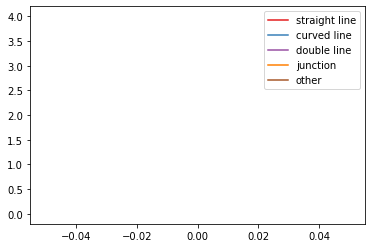

In [62]:
plt.figure(figsize=(12,8));

colors = cm.Set1(np.linspace(0,1,7))

for ii, inds in enumerate(feature_groups):

    plt.subplot(2,2,1)
    yvals = np.mean(mean[inds,:], axis=1)
    plt.plot(curv_score[inds], yvals,'.',color=colors[ii,:])
    plt.xlabel('curv score (z)');
    plt.ylabel('mean');
    plt.xlim([-3.5, 3.5])
    ylims = [0, 0.00125]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))
    
    plt.subplot(2,2,2)
    yvals = np.mean(var[inds,:], axis=1)
    plt.plot(curv_score[inds], yvals,'.',color=colors[ii,:])
    plt.xlabel('curv score (z)');
    plt.ylabel('variance');
    plt.xlim([-3.5, 3.5])
    ylims = [0, 10**(-6.3)]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))

    plt.subplot(2,2,3)
    yvals = np.mean(mean[inds,:], axis=1)
    plt.plot(lin_score[inds], yvals,'.',color=colors[ii,:])
    plt.xlabel('rect score (z)');
    plt.ylabel('mean');
    plt.xlim([-3.5, 3.5])
    ylims = [0, 0.00125]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))
    
    plt.subplot(2,2,4)
    yvals = np.mean(var[inds,:], axis=1)
    plt.plot(lin_score[inds], yvals,'.',color=colors[ii,:])
    plt.xlabel('rect score (z)');
    plt.ylabel('variance');
    plt.xlim([-3.5, 3.5])
    ylims = [0, 10**(-6.3)]
    plt.ylim(ylims)
    assert(np.all(yvals<ylims[1]))
    
plt.suptitle('all features')

plt.figure()
for ii in range(5):
    plt.plot(0,ii,color=colors[ii,:])
plt.legend(feature_group_names)



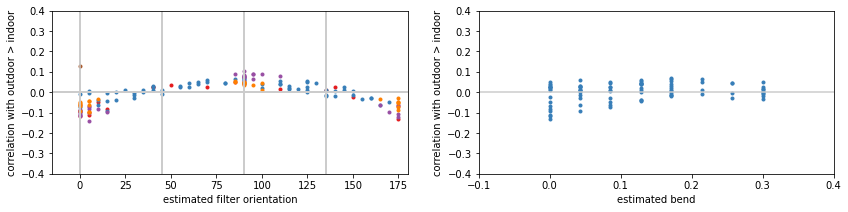

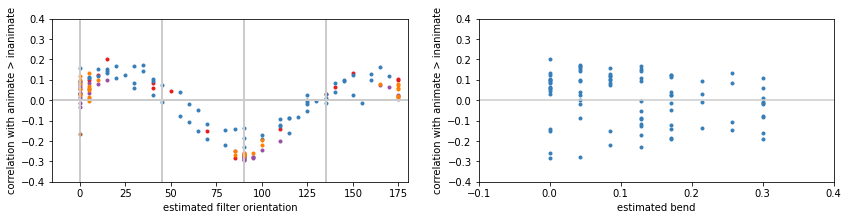

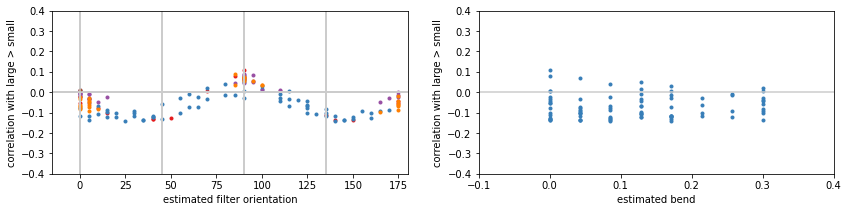

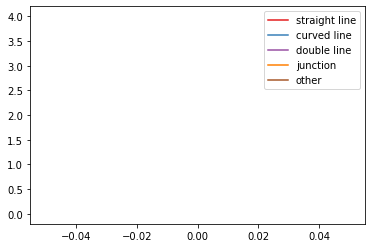

In [77]:
# Plot partial correlation of feature channels with semantic features

colors = cm.Set1(np.linspace(0,1,7))

n_bins = 12;
linear_bins=False


for ai, aa in enumerate(axes_to_do_partial):
    
    name = partial_signed_names[ai]
    
    plt.figure(figsize=(14,3));
    
    
    for ii, inds in enumerate(feature_groups):


        plt.subplot(1,2,1)
        vals = np.mean(partial_corr[inds,:,ai], axis=1)
        ori = np.mod(estim_orient_values[inds],180);

        plt.plot(ori, vals,'.', color=colors[ii,:]) 
        
        plt.xlabel('estimated filter orientation');
        plt.ylabel('correlation with %s'%name);
        plt.xlim([-15, 180])
        plt.ylim([-0.40, 0.40])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])
        plt.axhline(0,color=[0.8, 0.8, 0.8])
     
    vals = np.mean(partial_corr[:,:,ai], axis=1)
    ori = np.mod(estim_orient_values,180);

    # xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(ori, vals, \
    #                                 n_bins=n_bins, linear_bins=linear_bins, \
    #                                 return_std=True)    
    # plt.errorbar(xbinned, ybinned, ystd, color='k',zorder=10)
        
    plt.subplot(1,2,2)
    inds = is_single
    vals = np.mean(partial_corr[inds,:,ai], axis=1)
    bend = np.mod(estim_bend_values[inds],180);

    plt.plot(bend, vals,'.', color=colors[1,:]) 
    # xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(bend, vals, \
    #                                 n_bins=n_bins, linear_bins=linear_bins, \
    #                                 return_std=True)
    # plt.errorbar(xbinned, ybinned, ystd, color='k',zorder=10)
    plt.xlabel('estimated bend');
    plt.ylabel('correlation with %s'%name);
    plt.xlim([-0.1, 0.4])
    plt.ylim([-0.40, 0.40])
    plt.axhline(0,color=[0.8, 0.8, 0.8])

plt.figure()
for ii in range(5):
    plt.plot(0,ii,color=colors[ii,:])
plt.legend(feature_group_names)


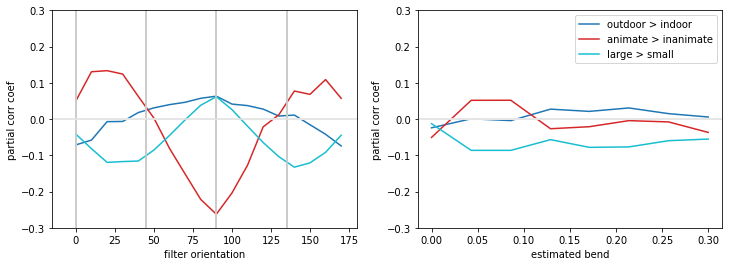

In [35]:
# Overlaying different semantic axes, partial correlations

plt.figure(figsize=(12,4));

lh = []

colors = cm.tab10(np.linspace(0,1,4))[[0,1,3],:]

for ai, aa in enumerate(axes_to_do_partial):

    vals = np.mean(partial_corr[:,:,ai], axis=1)
    
    xvals = np.arange(0,180,10)+0.001;
    ori = np.round(np.mod(estim_orient_values,180),1);
    inds = [(np.abs(ori-xx)<5) | (np.abs(ori-180-xx)<5) for xx in xvals]
    sums =[np.sum(ii) for ii in inds]
    assert(np.sum(sums)==150)
    yvals = [np.mean(vals[ii]) for ii in inds]

    plt.subplot(1,2,1)
    plt.plot(xvals,yvals,color=colors[ai,:])   
    plt.xlabel('filter orientation');
    plt.xlim([-15, 180])
    for ii in np.arange(0,180,45):
        plt.axvline(ii, color=[0.8, 0.8, 0.8])
    plt.axhline(0, color=[0.9, 0.9, 0.9])
    plt.ylabel('partial corr coef')
    plt.ylim([-0.30, 0.30])
    
    bend = np.round(estim_bend_values,3)
    xvals = np.unique(bend)
    yvals = np.array([np.mean(vals[bend==bb]) for bb in xvals])
    
    ax = plt.subplot(1,2,2)
    l, = ax.plot(xvals,yvals, color=colors[ai,:])
    lh.append(l)
    plt.xlabel('estimated bend');
    plt.axhline(0, color=[0.9, 0.9, 0.9]);
    plt.ylabel('partial corr coef')
    plt.ylim([-0.30, 0.30])
    
plt.legend(lh, partial_signed_names)

In [31]:
xvals

array([0.   , 0.043, 0.086, 0.129, 0.171, 0.214, 0.257, 0.3  ])

In [32]:
yvals

array([array([-0.12921448,  0.04016463, -0.08420306, -0.112266  ,  0.02802084,
              -0.02427351,  0.01518998,  0.0133769 , -0.08722081, -0.09520126,
               0.02588573,  0.03654547, -0.09750614,  0.05507085, -0.0619477 ,
              -0.14260966,  0.06439791, -0.08638619,  0.07531353,  0.02721625,
               0.07384303, -0.04958572, -0.06815655,  0.02671257,  0.10247304,
               0.07831375,  0.08213789, -0.03274672,  0.03754975, -0.09079021,
              -0.12135996, -0.07425348,  0.05455562,  0.07910752,  0.07424738,
              -0.05449295, -0.10103903, -0.11838868, -0.04689428, -0.08291487,
               0.0447824 , -0.11142913, -0.09670582, -0.10560719, -0.04982689,
              -0.06155666,  0.08898466, -0.04264849, -0.08742046, -0.0897273 ,
              -0.06385733,  0.05020036, -0.09373279,  0.05145713, -0.10626508,
               0.08810034,  0.08812425, -0.06952442, -0.05980387,  0.08337787,
              -0.06237665, -0.09875896, -0.0522084 ,

In [25]:
np.sum([np.sum(ii) for ii in inds])

84

In [13]:
np.arange(0,180,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170])

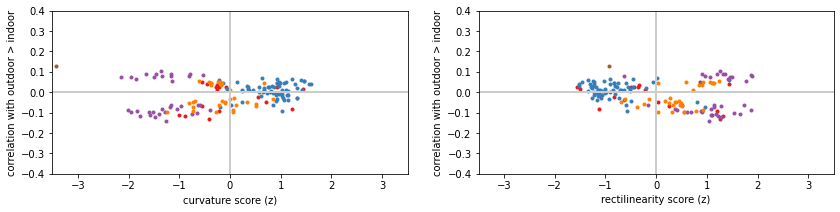

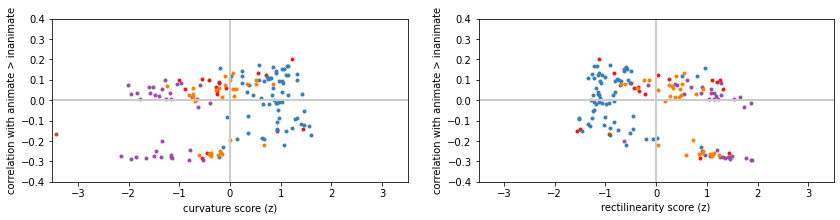

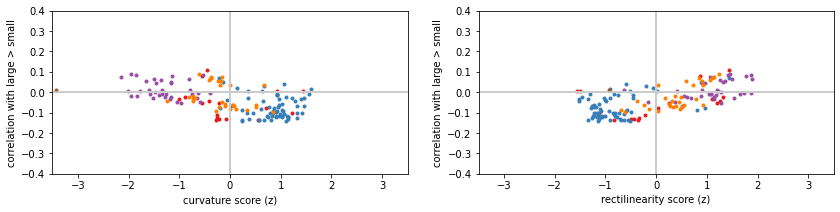

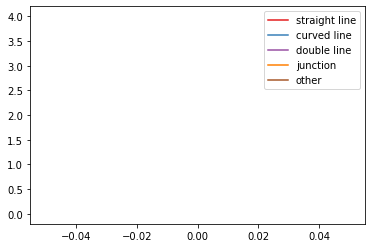

In [76]:
# Plot partial correlation of feature channels with semantic features

colors = cm.Set1(np.linspace(0,1,7))

for ai, aa in enumerate(axes_to_do_partial):
    
    name = partial_signed_names[ai]
    
    plt.figure(figsize=(14,3));
        
    for ii, inds in enumerate(feature_groups):

        plt.subplot(1,2,1)
        vals = np.mean(partial_corr[inds,:,ai], axis=1)
        
        plt.plot(curv_score[inds], vals,'.', color=colors[ii,:]) 
        plt.xlabel('curvature score (z)');
        plt.ylabel('correlation with %s'%name);
        plt.xlim([-3.5, 3.5])
        plt.ylim([-0.40, 0.40])
        plt.axvline(0, color=[0.8, 0.8, 0.8])
        plt.axhline(0,color=[0.8, 0.8, 0.8])
        
        plt.subplot(1,2,2)
        vals = np.mean(partial_corr[inds,:,ai], axis=1)
        
        plt.plot(lin_score[inds], vals,'.', color=colors[ii,:])
        
        plt.xlabel('rectilinearity score (z)');
        plt.ylabel('correlation with %s'%name);
        plt.xlim([-3.5, 3.5])
        plt.ylim([-0.40, 0.40])
        plt.axvline(0, color=[0.8, 0.8, 0.8])
        plt.axhline(0,color=[0.8, 0.8, 0.8])

    
plt.figure()
for ii in range(5):
    plt.plot(0,ii,color=colors[ii,:])
plt.legend(feature_group_names)


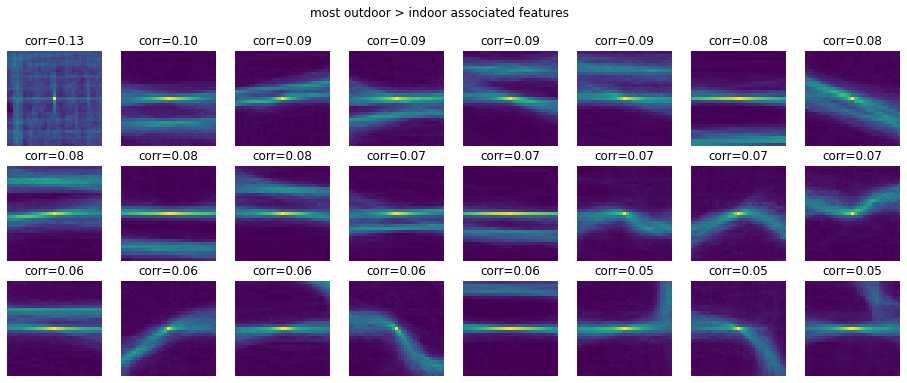

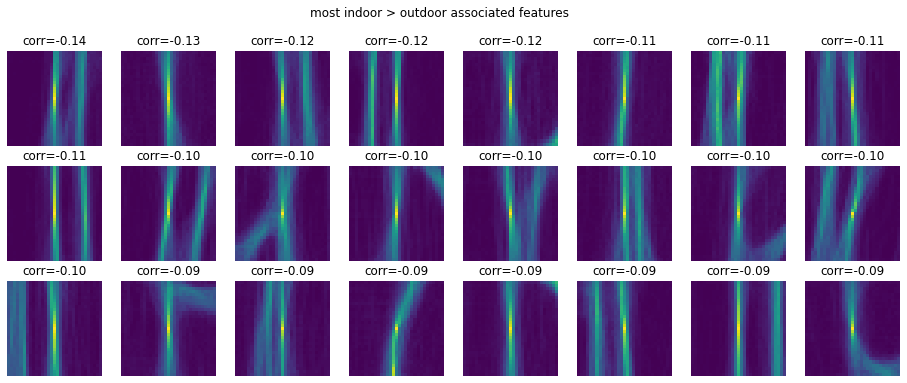

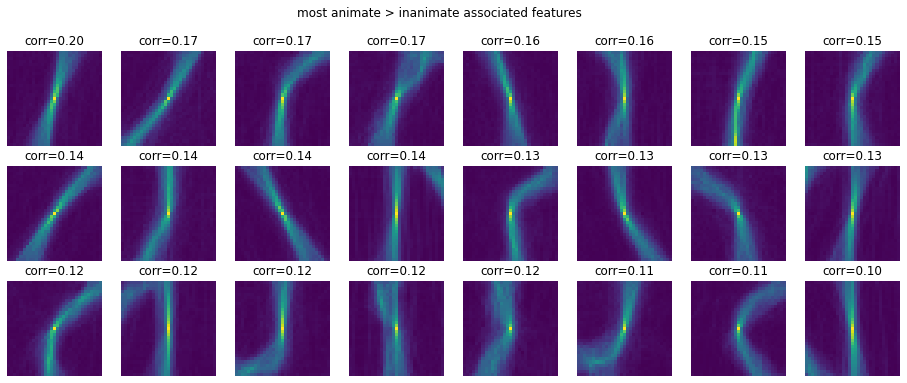

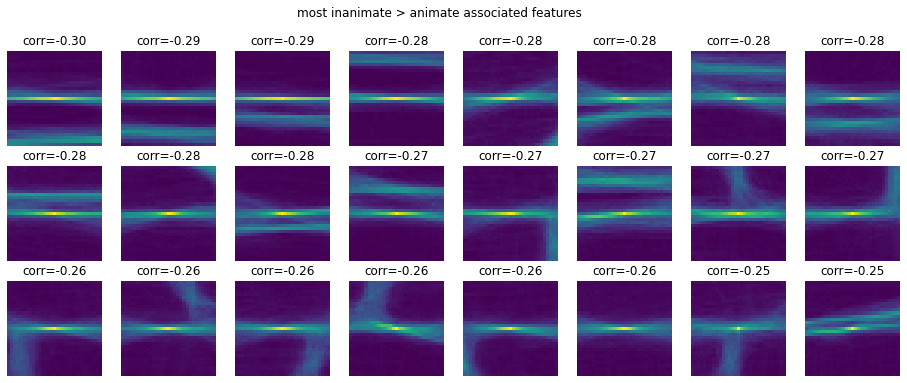

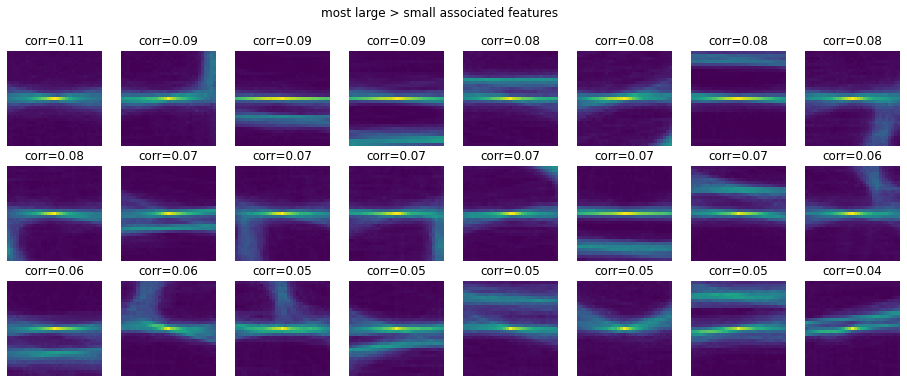

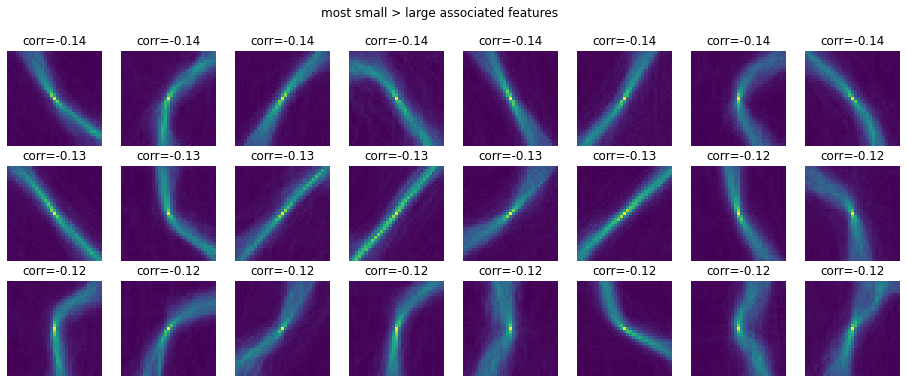

In [99]:
# plot features sorted by their semantic associations
n2plot = 24;
npx=3; npy=8;

for ai, aa in enumerate(axes_to_do_partial):
    
    name = partial_signed_names[ai]
    name_inverse = partial_signed_names_inverse[ai]

    # sort all features by semantic correlations
    vals = np.mean(partial_corr[:,:,ai], axis=1)
    
    plot_order = np.flip(np.argsort(vals))
    
    plt.figure(figsize=(16,6));
    for fi, ff in enumerate(plot_order[0:n2plot]):
        plt.subplot(npx,npy,fi+1)
        plt.pcolormesh(feature_ims[:,:,ff])
        plt.axis('square')
        plt.gca().invert_yaxis()
        plt.axis('off')
        plt.title('corr=%.2f'%(np.mean(partial_corr[ff,:,ai])))

    plt.suptitle('most %s associated features'%name)

    plot_order = np.argsort(vals)
    
    plt.figure(figsize=(16,6));
    for fi, ff in enumerate(plot_order[0:n2plot]):
        plt.subplot(npx,npy,fi+1)
        plt.pcolormesh(feature_ims[:,:,ff])
        plt.axis('square')
        plt.gca().invert_yaxis()
        plt.axis('off')
        plt.title('corr=%.2f'%(np.mean(partial_corr[ff,:,ai])))

    plt.suptitle('most %s associated features'%name_inverse)


In [104]:
# look at correlations as a function of pRF params

import copy

n_axes =len(axes_to_do_partial)
n_quadrants = 4;

angle_ranges = [[ii, ii+90] for ii in np.arange(0,271,90)]

x = models[:,0]
y = models[:,1]
y_reflected = np.abs(copy.deepcopy(y))

angles = np.round(np.mod(np.arctan2(y,x)*180/np.pi, 360),1)
angles_reflected = np.round(np.mod(np.arctan2(y_reflected, x)*180/np.pi, 360),1)

ecc = np.sqrt(models[:,0]**2+models[:,1]**2)*8.4
sizes = models[:,2]*8.4
ecc_min = 2;

no_angle = ecc<10**(-2)
angles[no_angle] = np.nan
angles_reflected[no_angle] = np.nan

quadrant_names = ['upper right (ecc>%.0f deg)'%ecc_min,'upper left','lower left','lower right']

mean_info_each_quadrant = np.zeros((n_axes, n_quadrants))
std_info_each_quadrant = np.zeros((n_axes, n_quadrants))

for ai, aa in enumerate(axes_to_do_partial):
    vals = np.mean(np.abs(partial_corr[:,:,ai]), axis=0)
    for qq in range(n_quadrants):
        inds = (angles>=angle_ranges[qq][0]) & (angles<angle_ranges[qq][1]) & \
                (ecc>ecc_min)
        mean_info_each_quadrant[ai,qq] = np.mean(vals[inds])
        std_info_each_quadrant[ai,qq] = np.std(vals[inds])


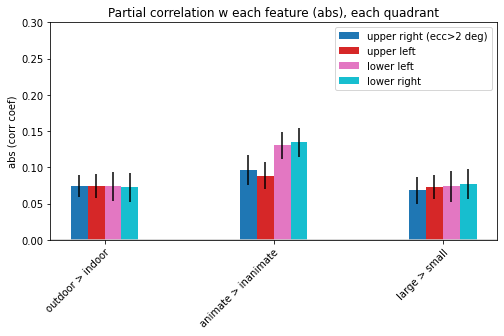

In [101]:
mean_vals = mean_info_each_quadrant
std_vals = std_info_each_quadrant

title = 'Partial correlation w each feature (abs), each quadrant'

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=std_vals, \
                           colors=None, space=0.3, \
                            xticklabels=partial_signed_names, ylabel='abs (corr coef)', \
                            ylim=[0, 0.3], title=title, horizontal_line_pos=0,\
                            legend_labels=quadrant_names, \
                            legend_overlaid=True, legend_separate=False, \
                            fig_size=(8,4))


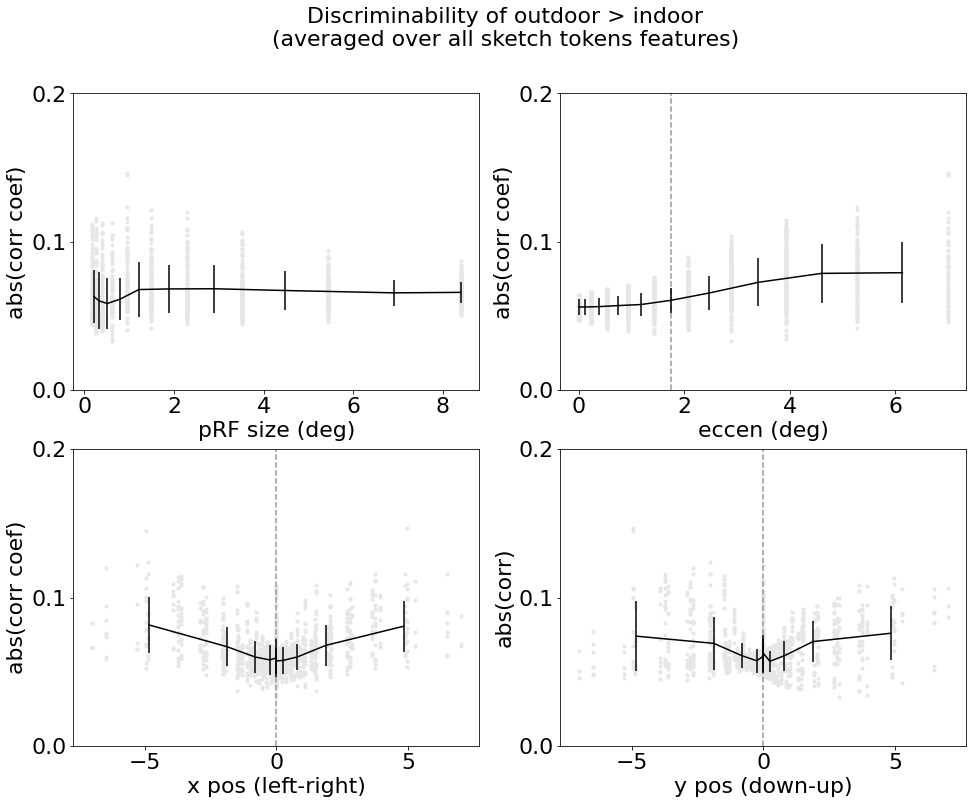

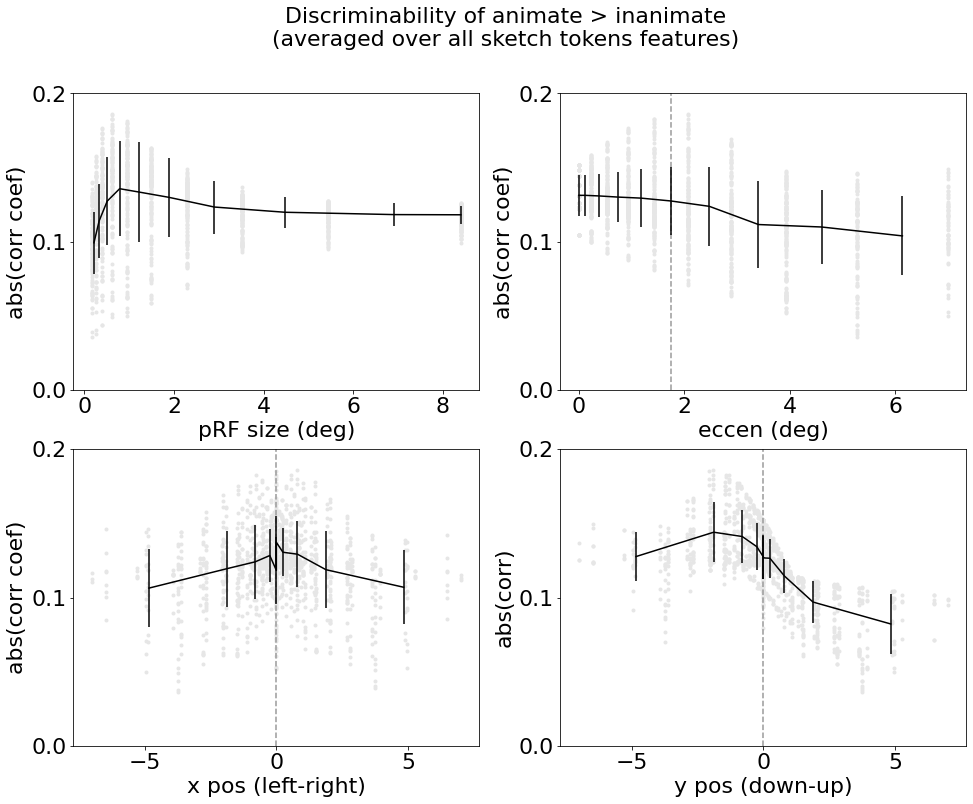

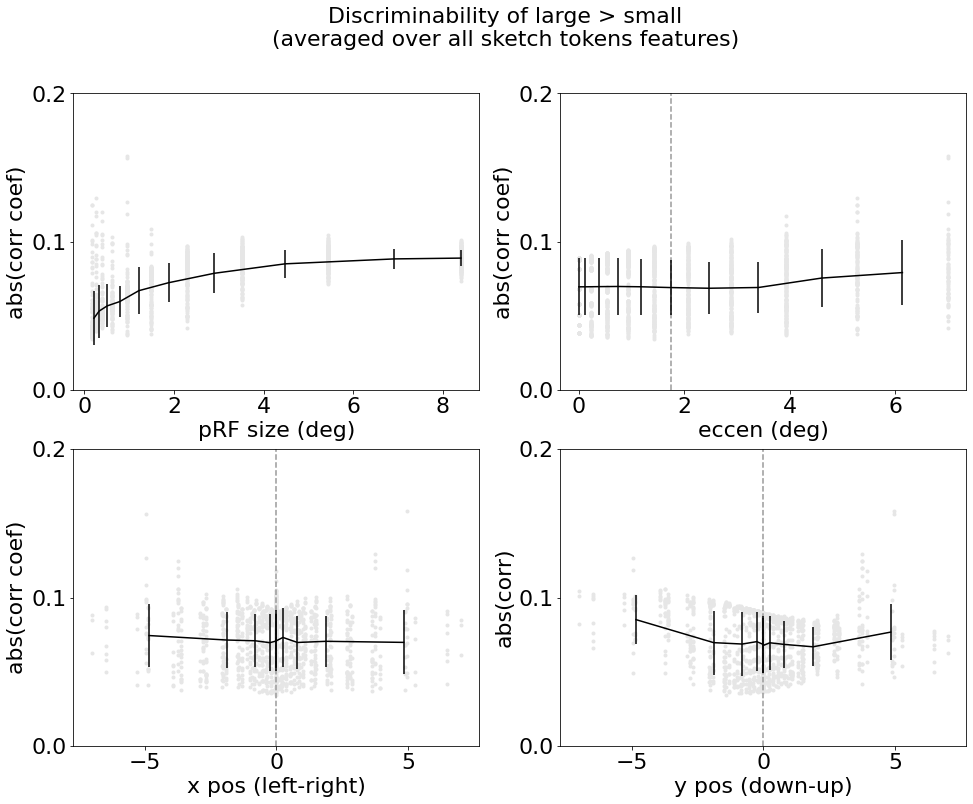

In [103]:
# plot semantic corr coefs as a function of pRF params

n_bins = 10;
linear_bins=False

ecc_vals = np.unique(np.round(ecc,2))
ecc_cutoff = ecc_vals[4]+(ecc_vals[5] - ecc_vals[4])/2

plot_utils.set_all_font_sizes(22)
for ai, aa in enumerate(axes_to_do_partial):
    
    name = partial_signed_names[ai]
    vals = np.mean(np.abs(partial_corr[:,:,ai]), axis=0)
    
    
    plt.figure(figsize=(16,12));

    plt.subplot(2,2,1)
    x_vals = models[:,2]*8.4
    plt.plot(x_vals, vals,'.',color=[0.9, 0.9, 0.9])
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.errorbar(xbinned, ybinned, ystd, color='k',zorder=10)
    plt.xlabel('pRF size (deg)')
    plt.ylabel('abs(corr coef)')
    plt.ylim([0, 0.2])
    plt.yticks([0,0.1,0.2])

    plt.subplot(2,2,2)
    x_vals = np.sqrt(models[:,0]**2+models[:,1]**2)*8.4
    plt.plot(x_vals, vals,'.',color=[0.9, 0.9, 0.9])
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.errorbar(xbinned, ybinned, ystd, color='k',zorder=10)
    plt.xlabel('eccen (deg)')
    plt.ylabel('abs(corr coef)')
    plt.ylim([0, 0.2])
    plt.axvline(ecc_cutoff,linestyle='--',color=[0.6, 0.6, 0.6])
    plt.yticks([0,0.1,0.2])

    plt.subplot(2,2,3)
    x_vals = models[:,0]*8.4
    plt.plot(x_vals, vals,'.',color=[0.9, 0.9, 0.9])
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.errorbar(xbinned, ybinned, ystd, color='k',zorder=10)
    plt.xlabel('x pos (left-right)')
    plt.ylabel('abs(corr coef)')
    plt.ylim([0, 0.2])
    plt.axvline(0,linestyle='--',color=[0.6, 0.6, 0.6])
    plt.yticks([0,0.1,0.2])

    plt.subplot(2,2,4)
    x_vals = models[:,1]*8.4
    plt.plot(x_vals, vals,'.',color=[0.9, 0.9, 0.9])
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.errorbar(xbinned, ybinned, ystd, color='k',zorder=10)
    plt.xlabel('y pos (down-up)')
    plt.ylabel('abs(corr)')
    plt.ylim([0, 0.2])
    plt.axvline(0,linestyle='--',color=[0.6, 0.6, 0.6])
    plt.yticks([0,0.1,0.2])

    plt.suptitle('Discriminability of %s\n(averaged over all sketch tokens features)'%name)

In [105]:
# t-test, compare upper vs lower visual field

import scipy.stats

upper_pts = np.where((angles<180) & (angles>0))[0]
lower_pts = np.where((angles>180) & (angles<360))[0]
print('n upper: %d'%upper_pts.shape[0])
print('n lower: %d'%lower_pts.shape[0])

for ai, aa in enumerate(axes_to_do_partial):
    
    vals = np.mean(np.abs(partial_corr[:,:,ai]), axis=0)
    
    vals_upper = vals[upper_pts]
    vals_lower = vals[lower_pts]

    print('%s corr, lower vs upper visual field'%partial_signed_names[ai])
    print(scipy.stats.ttest_ind(vals_lower, vals_upper, equal_var=False))

n upper: 570
n lower: 570
outdoor > indoor corr, lower vs upper visual field
Ttest_indResult(statistic=-1.633730367211596, pvalue=0.10259512352939805)
animate > inanimate corr, lower vs upper visual field
Ttest_indResult(statistic=27.08100941974798, pvalue=2.922948329132433e-124)
large > small corr, lower vs upper visual field
Ttest_indResult(statistic=2.515757196178518, pvalue=0.012019978668231623)


In [106]:
# t-test, compare left vs right visual field

import scipy.stats

right_pts = np.where((angles<90)| (angles>270))[0]
left_pts = np.where((angles>90) & (angles<270))[0]
print('n right: %d'%right_pts.shape[0])
print('n left: %d'%left_pts.shape[0])

for ai, aa in enumerate(axes_to_do_partial):
    
    vals = np.mean(np.abs(partial_corr[:,:,ai]), axis=0)
    
    vals_left = vals[left_pts]
    vals_right = vals[right_pts]

    print('%s corr, left vs right visual field'%partial_signed_names[ai])
    print(scipy.stats.ttest_ind(vals_left, vals_right, equal_var=False))

n right: 570
n left: 570
outdoor > indoor corr, left vs right visual field
Ttest_indResult(statistic=-0.9589650104008502, pvalue=0.3377802685336604)
animate > inanimate corr, left vs right visual field
Ttest_indResult(statistic=-0.404253512308875, pvalue=0.6861022675573004)
large > small corr, left vs right visual field
Ttest_indResult(statistic=1.3144350346615348, pvalue=0.18896500608808706)


In [107]:
# t-test, compare more foveal vs more peripheral

import scipy.stats

ecc_vals = np.unique(np.round(ecc,2))
ecc_cutoff = ecc_vals[4]+(ecc_vals[5] - ecc_vals[4])/2
ecc_vals>ecc_cutoff

central_pts = np.where((ecc<ecc_cutoff))[0]
periph_pts = np.where((ecc>ecc_cutoff))[0]

print('n central: %d'%central_pts.shape[0])
print('n periph: %d'%periph_pts.shape[0])

for ai, aa in enumerate(axes_to_do_partial):
    
    vals = np.mean(np.abs(partial_corr[:,:,ai]), axis=0)
    
    vals_central = vals[central_pts]
    vals_periph = vals[periph_pts]

    print('%s corr, central vs peripheral visual field'%partial_signed_names[ai])
    print(scipy.stats.ttest_ind(vals_central, vals_periph, equal_var=False))

n central: 800
n periph: 656
outdoor > indoor corr, central vs peripheral visual field
Ttest_indResult(statistic=-21.87364081417577, pvalue=7.05232282741543e-84)
animate > inanimate corr, central vs peripheral visual field
Ttest_indResult(statistic=13.858383603589179, pvalue=2.9299725402667473e-40)
large > small corr, central vs peripheral visual field
Ttest_indResult(statistic=-3.1533842778437458, pvalue=0.0016485572092802931)
